In [2]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
plt.rcParams["figure.figsize"] = (3,3)

print (time.ctime())

Thu Aug  5 22:33:00 2021


In [8]:
# read a data file, store all data in arrays

file = "/Users/andreinomerotski/Documents/Andrei/python/NSLS-II/Beamline_Cycles-50s_W0028_H07-210805-191240-1.csv"


print (file)
time.ctime()

data=np.loadtxt(file, dtype= int, delimiter=",", usecols = (0,1,2,3))

y   = data[:, 0]
x   = data[:, 1]
t   = data[:, 2]
a   = data[:, 3]

for i in range(0,20):
    print (i, x[i],y[i],t[i],a[i])
    
print (len(t), time.ctime())

/Users/andreinomerotski/Documents/Andrei/python/NSLS-II/Beamline_Cycles-50s_W0028_H07-210805-191240-1.csv
0 144 176 157974581504 100
1 144 176 160030611712 100
2 144 176 160651330816 100
3 144 176 160819671552 150
4 144 176 162275093760 150
5 144 176 162478506496 125
6 144 176 163596890112 225
7 144 176 163713795840 125
8 144 176 163802431744 25
9 144 176 163917720064 25
10 144 176 164011147520 25
11 144 176 164046594560 50
12 144 176 164475600128 25
13 144 176 164852973056 375
14 144 176 165817925888 325
15 144 176 166147571456 225
16 144 176 166573556480 25
17 144 176 166711614208 225
18 144 176 166803878656 425
19 144 176 166859695872 250
29073337 Thu Aug  5 22:39:57 2021


'Thu Aug  5 22:41:49 2021'

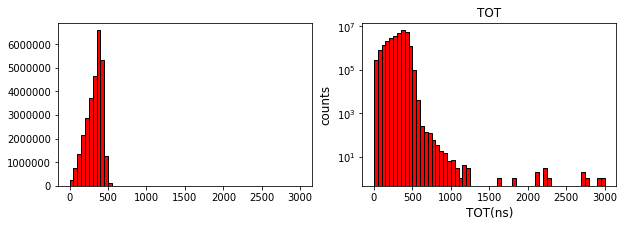

In [12]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 3))

ax0.hist(a, bins = 60, range = (0, 3000), color = 'r', ec = 'k')
plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOT(ns)',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
#plt.xlim(0, 240)
plt.yscale('log')
#plt.ylim(0, 10000)
#plt.show()

ax1.hist(a, bins = 60, range = (0, 3000), color = 'r', ec = 'k')
plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOT(ns)',fontsize = 12)
plt.ylabel('counts',fontsize = 12)

time.ctime()


(0, 256)

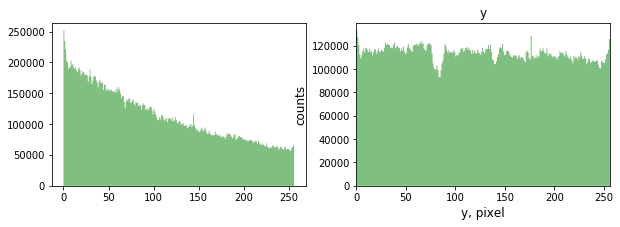

In [13]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 3))

ax0.hist(x, bins = 256, range = (0, 256), color = 'g', alpha=0.5, histtype = 'stepfilled')
plt.title("x", fontsize = 12) # change the title
plt.xlabel('x, pixel',fontsize = 12)
plt.ylabel('counts',fontsize = 12)

ax1.hist(y, bins = 256, range = (0, 256), color = 'g', alpha=0.5, histtype = 'stepfilled')
plt.title("y", fontsize = 12) # change the title
plt.xlabel('y, pixel',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.xlim(0, 256)

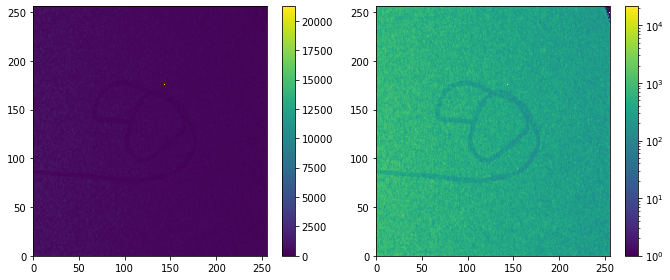

In [14]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(x, y, bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(x, y, bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()


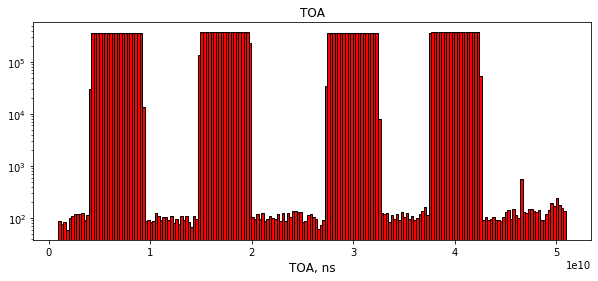

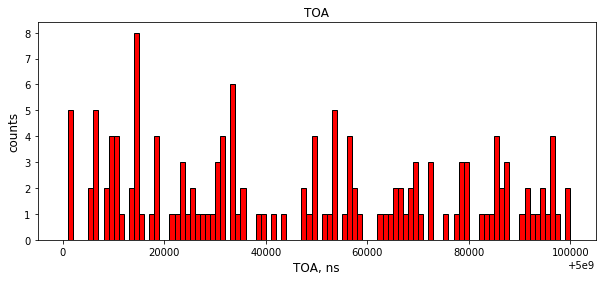

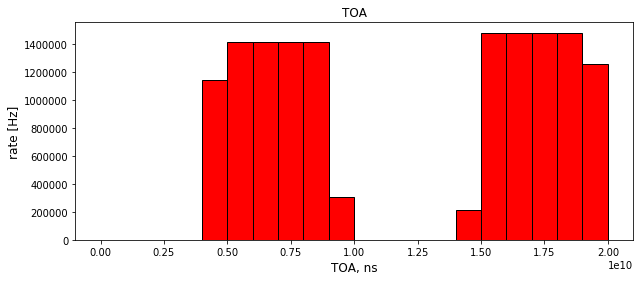

In [24]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(t/4096.*25., bins = 200, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.yscale('log')
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(t/4096.*25., bins = 100, range = (0.5000E+10, 0.50001E+10), color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(t/4096.*25., bins = 20, range = (0., 2.0E+10), color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('rate [Hz]',fontsize = 12)
plt.show()


In [22]:
xon =[]; yon = []; xoff = []; yoff = []


tminon = 0.35E+10; tmaxon = 1.05E+10; tminoff = 1.35E+10; tmaxoff = 2.01E+10

for i in range(len(t)):
    if (tminon < t[i]/4096.*25 < tmaxon): 
        xon.append(x[i])
        yon.append(y[i])
    if (tminoff < t[i]/4096.*25 < tmaxoff): 
        xoff.append(x[i])
        yoff.append(y[i])
        
print(len(xon), len(xoff))

7120883 7397603


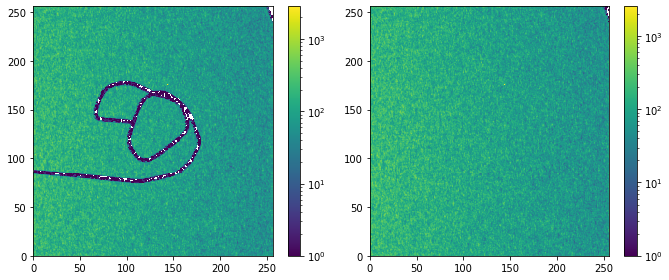

In [23]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(xon, yon, bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(xoff, yoff, bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

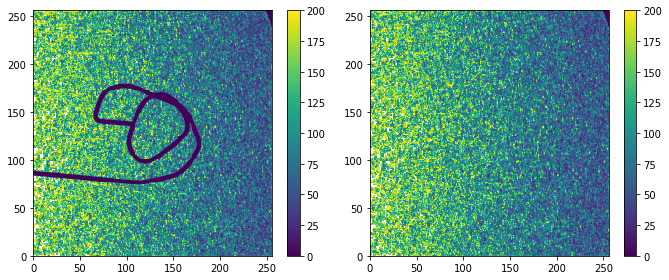

In [26]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(xon, yon, bins = 256, range = [(0, 256), (0, 256)], cmax = 200)
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(xoff, yoff, bins = 256, range = [(0, 256), (0, 256)], cmax = 200)
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()

In [27]:
xon1 =[]; yon1 = []; xoff1 = []; yoff1 = []


tminon1 = 2.5E+10; tmaxon1 = 3.5E+10; tminoff1 = 3.5E+10; tmaxoff1 = 4.5E+10

for i in range(len(t)):
    if (tminon1 < t[i]/4096.*25 < tmaxon1): 
        xon1.append(x[i])
        yon1.append(y[i])
    if (tminoff1 < t[i]/4096.*25 < tmaxoff1): 
        xoff1.append(x[i])
        yoff1.append(y[i])
        
print(len(xon), len(xoff))

7120883 7397603


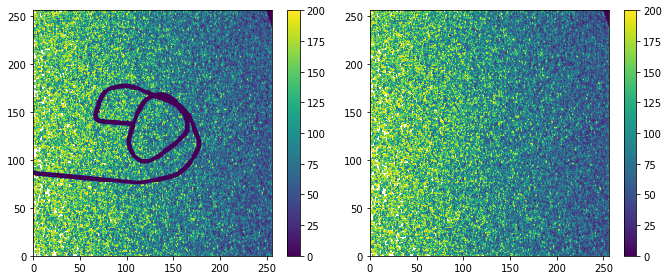

In [28]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(xon1, yon1, bins = 256, range = [(0, 256), (0, 256)], cmax = 200)
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(xoff1, yoff1, bins = 256, range = [(0, 256), (0, 256)], cmax = 200)
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()